In [19]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import math as math

In [20]:
wordCountDF = pd.read_csv('wordCountDF.csv')

In [23]:
wordCountDF.drop('Unnamed: 0', axis=1)

,Word,Count
0,ards,104
1,pneumonia,76
2,hydroxychloroquine,70
3,convalescent plasma,38
4,intensive care unit,33
...,...,...
2706,noncommunicable diseases,1
2707,non tuberculous mycobacteria,1
2708,non smoker,1
2709,non pharmacological interventions (npis),1


In [24]:
# Color palette for plots
colors = ['lightcoral', 'paleturquoise', 'palegoldenrod', 'plum', 'mediumaquamarine', 'sandybrown', 'mediumspringgreen', 'lightslategrey', 'palevioletred', ]

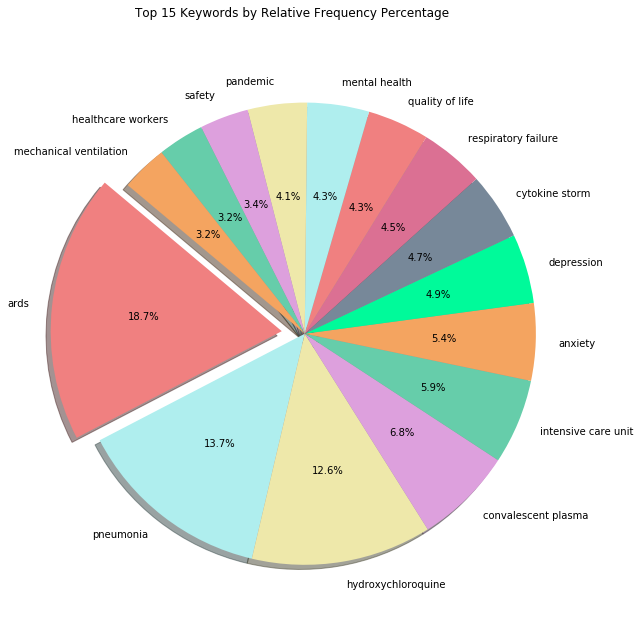

In [29]:
# Top 15
l = 15
explode = [0]*l
explode[0] = 0.1
plt.pie(wordCountDF['Count'][:l], labels=wordCountDF['Word'][:l], colors=colors[:l],
         explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title(f'Top {l} Keywords by Relative Frequency Percentage', pad=20)
plt.gcf().set_size_inches(9, 9)
#plt.savefig(f'Top_{l}_keywords_rel_freq.png', format='png', quality=95)
plt.tight_layout()
plt.show()

In [30]:
#Pareto Chart of top 15 keywords
l = 15
#cumulitive frequency sum
c_list = wordCountDF['Count'].cumsum()
c_list = c_list/wordCountDF['Count'].sum()*100
c_list

0         2.175277
1         3.764903
2         5.229032
3         6.023844
4         6.714077
           ...    
2706     99.916335
2707     99.937252
2708     99.958168
2709     99.979084
2710    100.000000
Name: Count, Length: 2711, dtype: float64

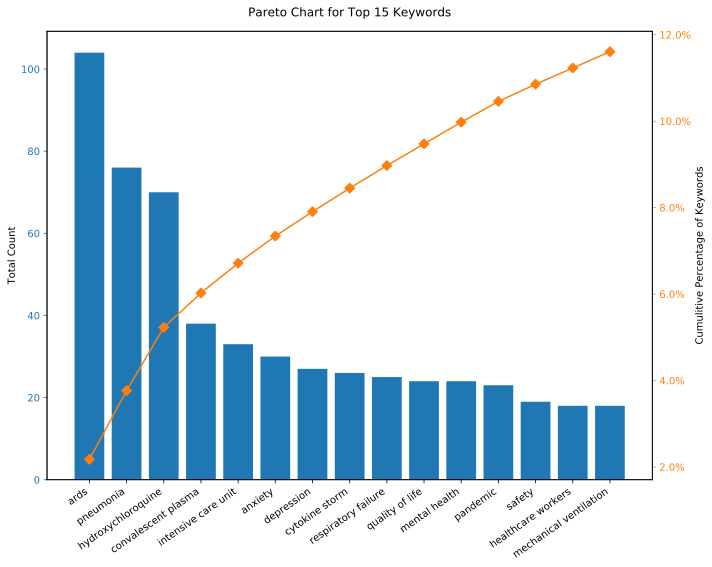

In [33]:
l = 15
fig, ax = plt.subplots()
ax.bar(wordCountDF['Word'][:l], wordCountDF['Count'][:l], color="C0")
ax2 = ax.twinx()
ax2.plot(wordCountDF['Word'][:l], c_list[:l], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(tk.PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.gcf().set_size_inches(10, 8)
%config InlineBackend.figure_format = 'svg'
ax.set_xticklabels(wordCountDF['Word'][:l], rotation=35, ha='right')
plt.title(f'Pareto Chart for Top {l} Keywords', pad=15)
plt.ylabel('Cumulitive Percentage of Keywords')
ax.set_ylabel('Total Count')
#plt.savefig(f'Pareto_Chart_for_Top_{l}_Keywords.png', format='png')
plt.tight_layout()
plt.show()

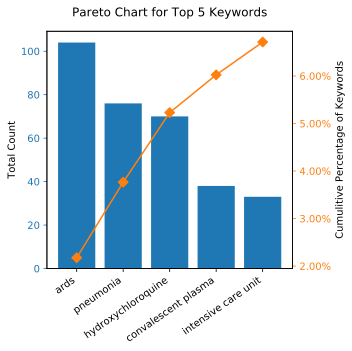

In [37]:
#Top 5 pareto chart
l = 5
fig, ax = plt.subplots()
ax.bar(wordCountDF['Word'][:l], wordCountDF['Count'][:l], color="C0")
ax2 = ax.twinx()
ax2.plot(wordCountDF['Word'][:l], c_list[:l], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(tk.PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.gcf().set_size_inches(5, 5)
%config InlineBackend.figure_format = 'svg'
ax.set_xticklabels(wordCountDF['Word'][:l], rotation=35, ha='right')
plt.title(f'Pareto Chart for Top {l} Keywords', pad=15)
plt.ylabel('Cumulitive Percentage of Keywords')
ax.set_ylabel('Total Count')
#plt.savefig(f'Pareto_Chart_for_Top_{l}_Keywords.png', format='png')
plt.tight_layout()
plt.show()